In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

In [3]:
housing = pd.read_csv('../../datasets/housing.csv')
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


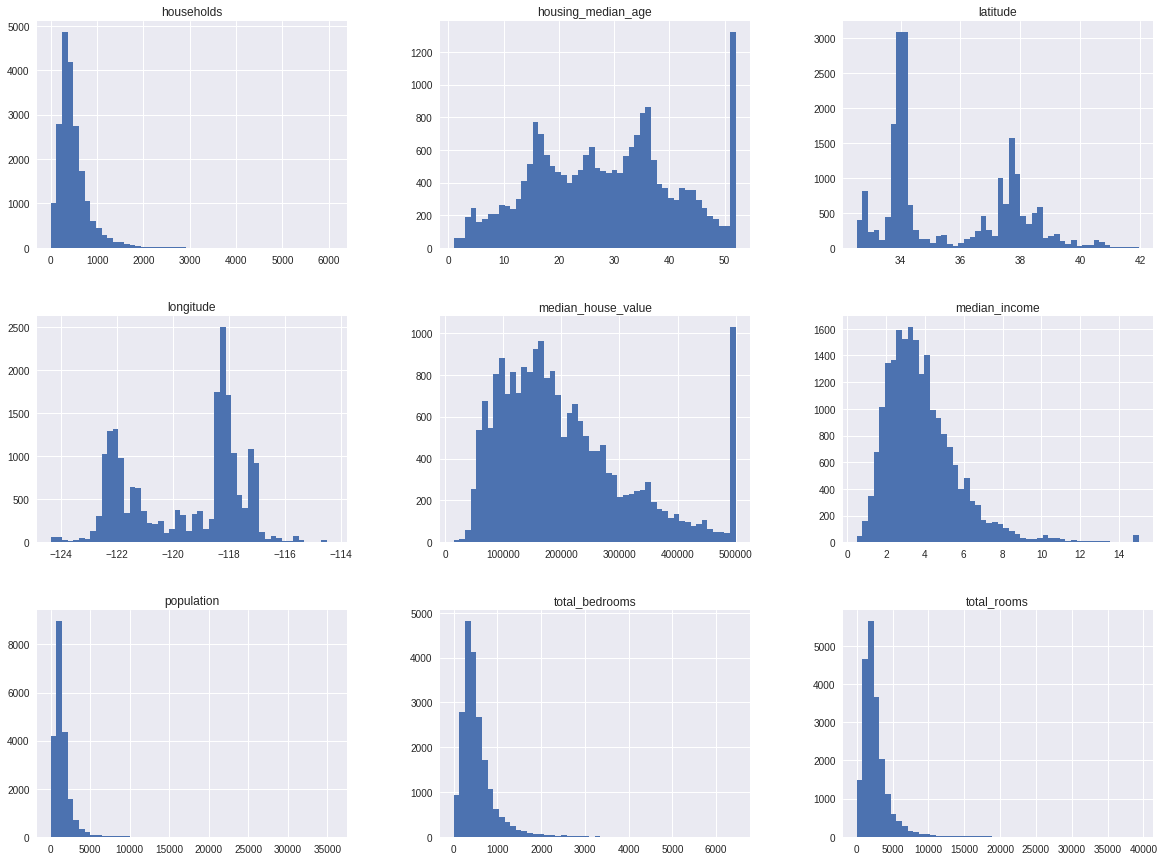

In [9]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

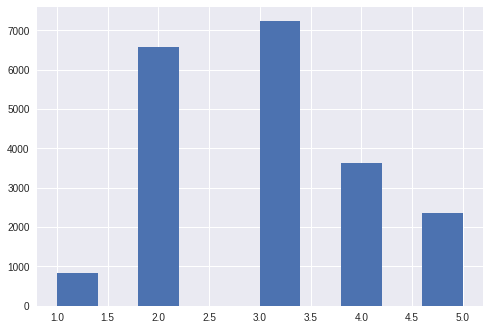

In [14]:
# We want to split dataset into training and test sets but we don't want to introduce bias.
# We know that the median_income is a very important feature, therefore we want to perform 
# stratified sampling - taking 

housing['income_cat'] = pd.cut(housing['median_income'], 
                               bins=[0, 1.5, 3, 4.5, 6, np.inf], 
                               labels=[1, 2, 3, 4, 5])
housing['income_cat'].hist()
plt.show()

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# shuffle and pick indexes based on the income_cat 
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [47]:
# comparing stratified vs random picks
comp_df = pd.DataFrame()
comp_df['Overall'] = housing['income_cat'].value_counts() / len(housing)
comp_df['Stratified'] = strat_test_set['income_cat'].value_counts() / len(strat_test_set)

_, rs_test = train_test_split(housing, random_state=42)
comp_df['Random'] = rs_test['income_cat'].value_counts() / len(rs_test)
comp_df['Rand. %error'] = (comp_df['Overall'] - comp_df['Random']) * 100
comp_df['Strat. %error'] = (comp_df['Overall'] - comp_df['Stratified']) * 100

# We can see that the stratified method performed significantly better sampling than the 
# random picking.
comp_df

,Overall,Stratified,Random,Rand. %error,Strat. %error
3,0.350581,0.350533,0.354845,-0.426357,0.004845
2,0.318847,0.318798,0.320736,-0.188953,0.004845
4,0.176308,0.176357,0.170543,0.576550,-0.004845
5,0.114438,0.114583,0.112209,0.222868,-0.014535
1,0.039826,0.039729,0.041667,-0.184109,0.009690


In [49]:
# We have our training and test sets now, therefore we can drop the artificial
# income_cat feature.
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)
    
strat_train_set.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN


In [50]:
# making a copy of the training set 
housing = strat_train_set.copy()

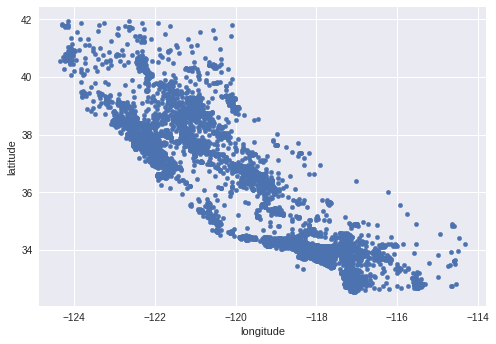

In [52]:
# visualizing latitude and longitude
housing.plot(kind='scatter', x='longitude', y='latitude');

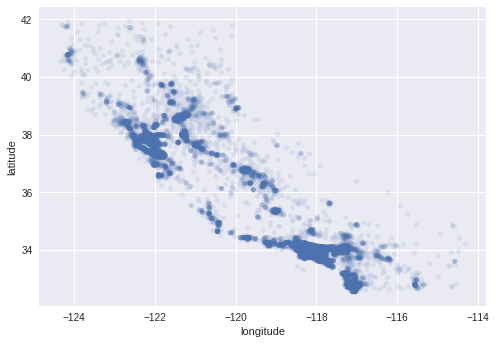

In [57]:
# using alpha value to visualize where the majority of districts is located,
# high-density areas are highlighted
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1);

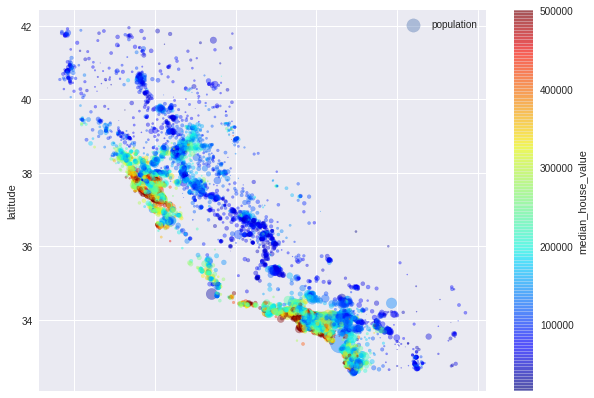

In [58]:
# visualizing prices and population on the above graph
housing.plot(kind='scatter', 
             x='longitude', 
             y='latitude', 
             alpha=0.4, 
             s=housing['population']/100, 
             label='population', 
             figsize=(10, 7), 
             c='median_house_value', 
             cmap=plt.get_cmap('jet'), 
             colorbar=True)
plt.legend()
plt.show()

In [62]:
# getting correlations with median_house_value
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

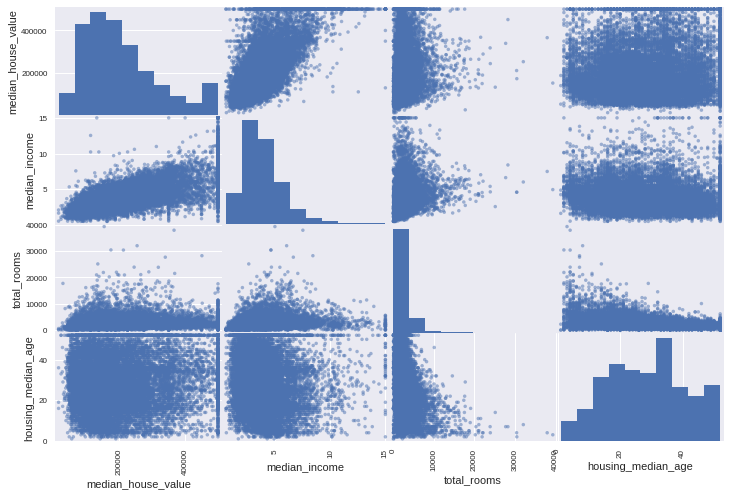

In [64]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

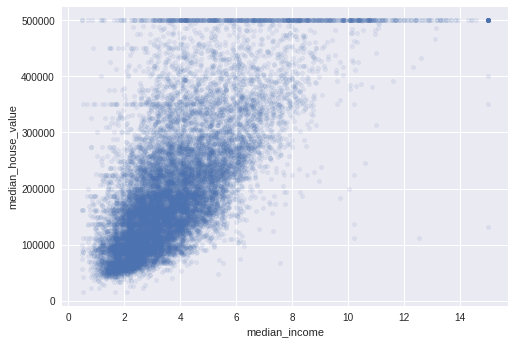

In [65]:
# zooming on median_income since it is the most promising attribute
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1);

## INTRODUCING NEW FEATURES

In [66]:
housing.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN


In [67]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [68]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,4.505810,0.231341,3.047847


In [70]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [74]:
# what we can observe here is the bedrooms_per_room as well as rooms_per_household are 
# more correlated with the target (median_house_value) that the original total_rooms 
housing.corr()['median_house_value'].abs().sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
bedrooms_per_room           0.259984
rooms_per_household         0.146285
latitude                    0.142724
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
longitude                   0.047432
population                  0.026920
population_per_household    0.021985
Name: median_house_value, dtype: float64

In [75]:
# split the training set into features and labels
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

## IMPUTING MISSING DATA WITH MEANS

In [121]:
from sklearn.impute import SimpleImputer 

imputer = SimpleImputer(strategy='median')

housing_numerical = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_numerical)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [79]:
# medians for each numeric feature is stored in imputer.statistics_ attribute
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [123]:
X = imputer.transform(housing_numerical)
housing_imputed = pd.DataFrame(X, 
                               columns=housing_numerical.columns, 
                               index=housing_numerical.index)
housing_imputed.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214


## HANDLING CATEGORICAL FEATURES - ONE HOT ENCODING

In [89]:
from sklearn.preprocessing import OneHotEncoder

housing_categorical = housing[['ocean_proximity']]
housing_categorical.head(5)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [90]:
cat_encoder = OneHotEncoder()
housing_categorical_1hot = cat_encoder.fit_transform(housing_categorical)
# sparse scipy matrix
housing_categorical_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [91]:
# dense numpy matrix
housing_categorical_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [92]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## IMPEMENTING CUSTOM TRANSFORMER

In [94]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN


In [104]:
# implementing custom transformer 
from sklearn.base import BaseEstimator, TransformerMixin

rooms_idx, bedrooms_idx, population_idx, households_idx = 3, 4, 5, 6 

class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room: bool = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_idx] / X[:, households_idx]
        population_per_household = X[:, population_idx] / X[:, households_idx]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_idx] / X[:, rooms_idx]
            return np.c_[X, 
                         rooms_per_household, 
                         population_per_household, 
                         bedrooms_per_room]
        else:
            return np.c_[X, 
                         rooms_per_household, 
                         population_per_household]

In [114]:
attr_adder = CombinedAttributeAdder()
housing_extra_attribs = attr_adder.fit_transform(housing.values)

colnames = housing.columns.values.tolist() + \
           ['rooms_per_household', 'population_per_household', 'bedrooms_per_room']

pd.DataFrame(housing_extra_attribs, columns=colnames).head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944,0.223852
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796,0.159057
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597,0.241291
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598,0.200866
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785,0.231341


## FEATURE SCALING and TRANSFORMATION PIPELINES

In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [116]:
# numerical pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attrib_adder', CombinedAttributeAdder()),
    ('scaler', StandardScaler())
])

In [124]:
housing_numerical.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214


In [125]:
housing_numerical_imputed = numerical_pipeline.fit_transform(housing_numerical)

In [127]:
housing_numerical_imputed

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [131]:
# handling both numerical and categorical values at the same time
from sklearn.compose import ColumnTransformer

num_attrs = list(housing_numerical)
cat_attrs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', numerical_pipeline, num_attrs),
    ('cat', OneHotEncoder(), cat_attrs)
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 16)

In [132]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

## TRAINING A MODEL

In [157]:
# using linear regression
from sklearn.linear_model import LinearRegression

lin_reg_regressor = LinearRegression()
lin_reg_regressor.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [158]:
# trying the model on some instance from the training set
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)

print(f'predictions: {lin_reg_model.predict(some_data_prepared)}')
print(f'labels: {some_labels.values}')

predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
labels: [286600. 340600. 196900.  46300. 254500.]


In [159]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg_regressor.predict(housing_prepared)
lin_reg_mse = mean_squared_error(housing_labels, housing_predictions)
lin_reg_rmse = np.sqrt(mse)
lin_reg_rmse

# this value is of rmse is rather bad, also it is taken from training set which means 
# that our model is underfitting the training data
#   => features might not provide enough information to make good predictions 
#   => model is not powerful enough

68628.19819848923

In [160]:
# Trying more powerful model 
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor()
tree_regressor.fit(housing_prepared, housing_labels)

housing_predictions = tree_regressor.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

# this rmse value indicates that either our model is perfect (probably not), or it has 
# badly overfitted the training data

0.0

In [161]:
# using k-fold cross-validation for better error estimation, without the need of 
# test set (this set should be used only for final testing before pushing the selected model
# into production)
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=tree_regressor, 
                         X=housing_prepared, 
                         y=housing_labels, 
                         scoring='neg_mean_squared_error',
                         cv=10, 
                         n_jobs=-1)

# decision tree is over fitting so badly that it has worse performance that 
# the linear regression
tree_rmse_scores = np.sqrt(-scores)
print(f'scores: {tree_rmse_scores}')
print(f'mean: {tree_rmse_scores.mean()}')
print(f'standard deviation: {tree_rmse_scores.std()}')

scores: [69729.77684846 67121.25142984 70122.06182857 69008.75813263
 71131.84422374 75420.34432285 71846.75457349 71203.31594793
 76796.25301699 68987.23446321]
mean: 71136.75947877226
standard deviation: 2813.7142186001483


In [163]:
# compute the same for the linear regression used as the first model
scores = cross_val_score(estimator=lin_reg_regressor, 
                         X=housing_prepared, 
                         y=housing_labels, 
                         scoring='neg_mean_squared_error', 
                         cv=10, 
                         n_jobs=-1)

lin_reg_rmse_scores = np.sqrt(-scores)
print(f'scores: {lin_reg_rmse_scores}')
print(f'mean: {lin_reg_rmse_scores.mean()}')
print(f'standard deviation: {lin_reg_rmse_scores.std()}')

scores: [66769.95296601 66969.11761014 70347.95244419 74742.31048634
 68031.13388938 71232.86773929 64959.90460273 68276.62598094
 71552.91566558 67665.10082067]
mean: 69054.78822052773
standard deviation: 2737.298959996444


In [167]:
# testing random forest regressor
from sklearn.ensemble import RandomForestRegressor

forest_regressor = RandomForestRegressor()
forest_regressor.fit(housing_prepared, housing_labels)
housing_predicted = forest_regressor.predict(housing_prepared)
forest_rmse = np.sqrt(mean_squared_error(housing_labels, housing_predicted))
print(f'rmse (whole training set): {forest_rmse}')

scores = cross_val_score(estimator=forest_regressor, 
                         X=housing_prepared, 
                         y=housing_labels,
                         scoring='neg_mean_squared_error', 
                         cv=10, 
                         n_jobs=-1)

forest_reg_rmse_scores = np.sqrt(-scores)
print(f'scores: {forest_reg_rmse_scores}')
print(f'mean: {forest_reg_rmse_scores.mean()}')
print(f'standard deviation: {forest_reg_rmse_scores.std()}')

# RMSE is still much lower on the whole training set than on the validation set which means
# that the model is still overfitting the data

rmse (whole training set): 18683.086563328394
scores: [49252.18000114 47828.99290351 49695.97521088 52248.85355473
 49829.47592802 53231.38361041 48743.60189317 48050.09970116
 52730.57106707 50229.88826606]
mean: 50184.10221361494
standard deviation: 1828.7639688690858


In [171]:
# tuning the hyperparametes using grid search
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'n_estimators': [3, 10, 30, 60, 100, 150],
        'max_features': [2, 4, 6, 8, 10]
    }
]

forest_regressor = RandomForestRegressor()

grid_search = GridSearchCV(estimator=forest_regressor, 
                           param_grid=param_grid, 
                           cv=5, 
                           n_jobs=-1, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [172]:
# get the best estimator
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [176]:
# get evaluation scores
cv_results = grid_search.cv_results_
for mean_score, params in sorted(zip(cv_results['mean_test_score'], cv_results['params'])):
    print(np.sqrt(-mean_score), params)

63772.16705369311 {'max_features': 2, 'n_estimators': 3}
60891.284362996725 {'max_features': 4, 'n_estimators': 3}
59652.92987875365 {'max_features': 6, 'n_estimators': 3}
59367.498744929384 {'max_features': 8, 'n_estimators': 3}
58458.01374631261 {'max_features': 10, 'n_estimators': 3}
55780.438617213 {'max_features': 2, 'n_estimators': 10}
52708.797966050595 {'max_features': 2, 'n_estimators': 30}
52694.44174276845 {'max_features': 4, 'n_estimators': 10}
52656.81941229056 {'max_features': 10, 'n_estimators': 10}
52327.9087671903 {'max_features': 2, 'n_estimators': 60}
52135.86627031976 {'max_features': 8, 'n_estimators': 10}
52008.24127906055 {'max_features': 6, 'n_estimators': 10}
51878.58288921332 {'max_features': 2, 'n_estimators': 100}
51658.100244243564 {'max_features': 2, 'n_estimators': 150}
50538.30287974629 {'max_features': 8, 'n_estimators': 30}
50496.976441846404 {'max_features': 4, 'n_estimators': 30}
50022.27805324232 {'max_features': 10, 'n_estimators': 30}
49849.309456

In [178]:
# analyzing feature importances
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.88013147e-02, 6.92459344e-02, 4.21313813e-02, 1.83102880e-02,
       1.65894046e-02, 1.76143435e-02, 1.62990490e-02, 3.12274258e-01,
       6.18146520e-02, 1.06702363e-01, 8.45136798e-02, 1.30276419e-02,
       1.53747888e-01, 6.90592478e-05, 3.65404947e-03, 5.20469317e-03])

In [187]:
# showing importances together with their corresponding names
extra_attrs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attrs = list(cat_encoder.categories_[0])
attrs = num_attrs + extra_attrs + cat_one_hot_attrs
sorted(zip(feature_importances, attrs), reverse=True)

[(0.3122742579850015, 'median_income'),
 (0.15374788776375442, 'INLAND'),
 (0.10670236336010364, 'pop_per_hhold'),
 (0.08451367979208221, 'bedrooms_per_room'),
 (0.07880131470424317, 'longitude'),
 (0.06924593436010858, 'latitude'),
 (0.06181465198443707, 'rooms_per_hhold'),
 (0.042131381281195174, 'housing_median_age'),
 (0.018310287977072234, 'total_rooms'),
 (0.0176143434555754, 'population'),
 (0.016589404569339394, 'total_bedrooms'),
 (0.016299049009243647, 'households'),
 (0.013027641865268837, '<1H OCEAN'),
 (0.005204693170644085, 'NEAR OCEAN'),
 (0.003654049474080942, 'NEAR BAY'),
 (6.905924784975517e-05, 'ISLAND')]

## EVALUATING MODEL ON THE TEST SET (FINAL)

In [188]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

# DON'T FIT!!!
X_test_prepared = full_pipeline.transform(X_test)

final_prediction = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)

print(final_rmse)

46978.73654656502


In [190]:
# finding the precision of this estimate - computing 95% confidence interval
from scipy import stats

confidence = 0.95
squared_errors = (final_prediction - y_test) ** 2
np.sqrt(stats.t.interval(confidence, 
                         len(squared_errors)-1, 
                         loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([44991.94056075, 48884.85102362])